# Training Data EDA — Headway Prediction TFT

Quick sanity check on the Beam-generated training Parquet before model training.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)

DATA_PATH = "../local_artifacts/processed_data/training_data.parquet"
df = pd.read_parquet(DATA_PATH)
print(f"Shape: {df.shape}")
print(f"\nColumns ({len(df.columns)}):")
print(df.dtypes)
df.head()

Shape: (146758, 22)

Columns (22):
trip_uid                       object
arrival_time                   object
group_id                       object
route_id                       object
time_idx                        int64
day_of_week                     int64
hour_sin                      float64
hour_cos                      float64
regime_id                      object
track_id                       object
service_headway               float64
preceding_train_gap           float64
preceding_route_id             object
empirical_median              float64
upstream_headway_14th         float64
travel_time_14th              float64
travel_time_14th_deviation    float64
travel_time_23rd              float64
travel_time_23rd_deviation    float64
travel_time_34th              float64
travel_time_34th_deviation    float64
stops_at_23rd                 float64
dtype: object


,trip_uid,arrival_time,group_id,route_id,time_idx,day_of_week,hour_sin,hour_cos,regime_id,track_id,service_headway,preceding_train_gap,preceding_route_id,empirical_median,upstream_headway_14th,travel_time_14th,travel_time_14th_deviation,travel_time_23rd,travel_time_23rd_deviation,travel_time_34th,travel_time_34th_deviation,stops_at_23rd
0,1739771940_C..S04R,2025-02-17T11:34:54+00:00,C_South,C,0,0,0.113203,-0.993572,Day,A1,24.300000,16.500000,E,10.416667,24.383333,1.916667,-0.166667,3.250000,-0.250000,4.833333,-0.250000,1.0
1,1739773140_C..S04R,2025-02-17T11:50:14+00:00,C_South,C,1,0,0.043619,-0.999048,Day,A1,15.333333,11.750000,E,10.416667,14.333333,2.916667,0.833333,4.333333,0.833333,5.666667,0.583333,1.0
2,1739774340_C..S04R,2025-02-17T12:11:10+00:00,C_South,C,2,0,-0.047978,-0.998848,Day,A1,20.933333,4.250000,E,9.633333,21.850000,2.000000,-0.133333,3.433333,-0.150000,5.166667,-0.033333,1.0
3,1739775270_C..S04R,2025-02-17T12:26:00+00:00,C_South,C,3,0,-0.113203,-0.993572,Day,A1,14.833333,4.433333,E,9.633333,14.983333,1.850000,-0.283333,3.166667,-0.416667,4.750000,-0.450000,1.0
4,1739776080_C..S04R,2025-02-17T12:40:00+00:00,C_South,C,4,0,-0.173648,-0.984808,Day,A1,14.000000,7.150000,E,9.633333,13.616667,2.233333,0.100000,3.766667,0.183333,5.250000,0.050000,1.0


In [28]:
df.loc[df.preceding_train_gap > 8].shape[0] / df.shape[0]

0.24727783153218222

In [36]:
df.loc[df.preceding_train_gap <= 20].shape[0] / df.shape[0]

0.9836192916229439

## Missing Values & Null Analysis

⚠️ Columns with nulls:
                            null_count  null_pct
upstream_headway_14th               82      0.06
travel_time_14th                    80      0.05
travel_time_14th_deviation          80      0.05
travel_time_34th                    52      0.04
travel_time_34th_deviation          52      0.04
preceding_train_gap                  1      0.00
preceding_route_id                   1      0.00


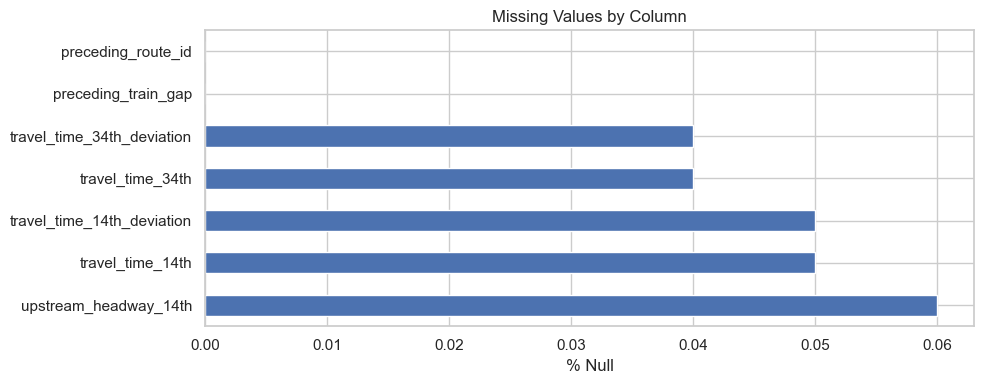

In [2]:
# Null counts
nulls = df.isnull().sum()
null_pct = (nulls / len(df) * 100).round(2)
null_df = pd.DataFrame({"null_count": nulls, "null_pct": null_pct})
null_df = null_df[null_df.null_count > 0].sort_values("null_pct", ascending=False)

if len(null_df) == 0:
    print("✅ No null values in any column")
else:
    print("⚠️ Columns with nulls:")
    print(null_df)
    fig, ax = plt.subplots(figsize=(10, 4))
    null_df.null_pct.plot.barh(ax=ax)
    ax.set_xlabel("% Null")
    ax.set_title("Missing Values by Column")
    plt.tight_layout()
    plt.show()

## Descriptive Statistics

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time_idx,146758.0,25419.100628,15686.916925,0.000000,12112.250000,24342.000000,37652.000000,57626.000000
day_of_week,146758.0,2.741575,1.890210,0.000000,1.000000,3.000000,4.000000,6.000000
hour_sin,146758.0,-0.247151,0.611700,-1.000000,-0.801254,-0.366501,0.216440,1.000000
hour_cos,146758.0,0.078723,0.747362,-1.000000,-0.725374,0.207912,0.831470,1.000000
service_headway,146758.0,9.376644,5.948147,0.516667,5.166667,8.316667,12.033333,89.416667
preceding_train_gap,146757.0,7.060923,28.667010,0.000000,2.633333,4.583333,8.000000,4568.666667
empirical_median,146758.0,8.915333,3.916080,3.950000,5.900000,8.333333,10.666667,87.166667
upstream_headway_14th,146676.0,9.359143,5.873239,0.000000,5.216667,8.333333,12.000000,89.400000
travel_time_14th,146678.0,2.230954,0.884351,0.016667,2.000000,2.083333,2.250000,61.416667
travel_time_14th_deviation,146678.0,0.142385,0.882043,-2.916667,-0.083333,0.000000,0.133333,59.300000


In [10]:
# Categorical columns
cat_cols = ['group_id', 'route_id', 'regime_id', 'track_id', 'preceding_route_id']
for col in cat_cols:
    if col in df.columns:
        print(f"\n--- {col} ---")
        print(df[col].value_counts())


--- group_id ---
group_id
E_South        57627
A_South        54368
C_South        34412
OTHER_South      351
Name: count, dtype: int64

--- route_id ---
route_id
E        57627
A        54368
C        34412
OTHER      351
Name: count, dtype: int64

--- regime_id ---
regime_id
Day      101093
Night     45665
Name: count, dtype: int64

--- track_id ---
track_id
A1    100127
A3     46631
Name: count, dtype: int64

--- preceding_route_id ---
preceding_route_id
E        57380
A        54188
C        34759
OTHER      430
Name: count, dtype: int64


## Target Variable Distribution (`service_headway`)

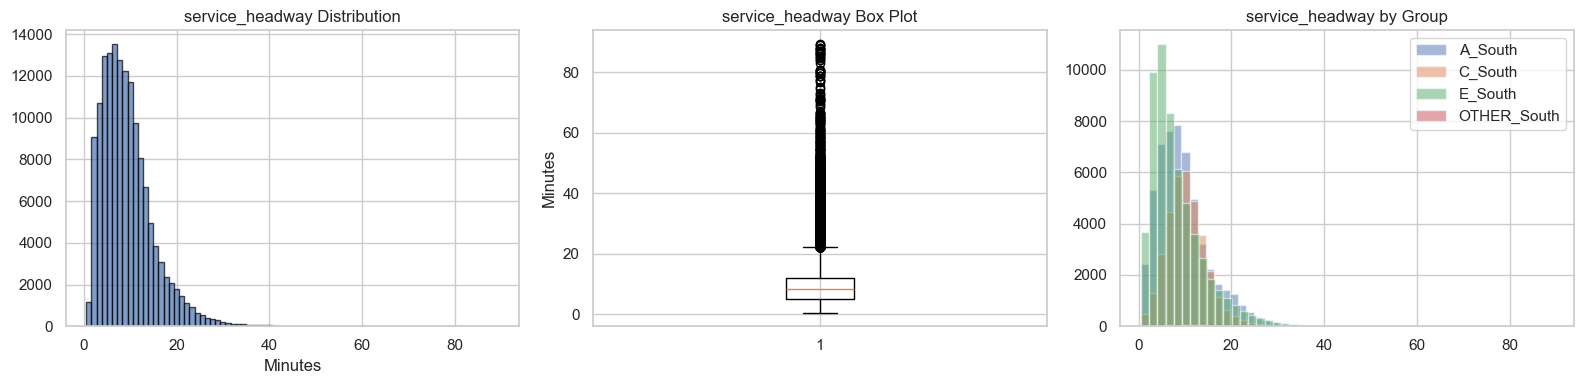

Skewness: 2.131
Kurtosis: 11.866


In [11]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Histogram
axes[0].hist(df['service_headway'], bins=80, edgecolor='black', alpha=0.7)
axes[0].set_title('service_headway Distribution')
axes[0].set_xlabel('Minutes')

# Box plot
axes[1].boxplot(df['service_headway'].dropna(), vert=True)
axes[1].set_title('service_headway Box Plot')
axes[1].set_ylabel('Minutes')

# By group
for gid, grp in df.groupby('group_id'):
    axes[2].hist(grp['service_headway'], bins=50, alpha=0.5, label=gid)
axes[2].set_title('service_headway by Group')
axes[2].legend()

plt.tight_layout()
plt.show()

print(f"Skewness: {df['service_headway'].skew():.3f}")
print(f"Kurtosis: {df['service_headway'].kurtosis():.3f}")

## Feature Correlation Heatmap

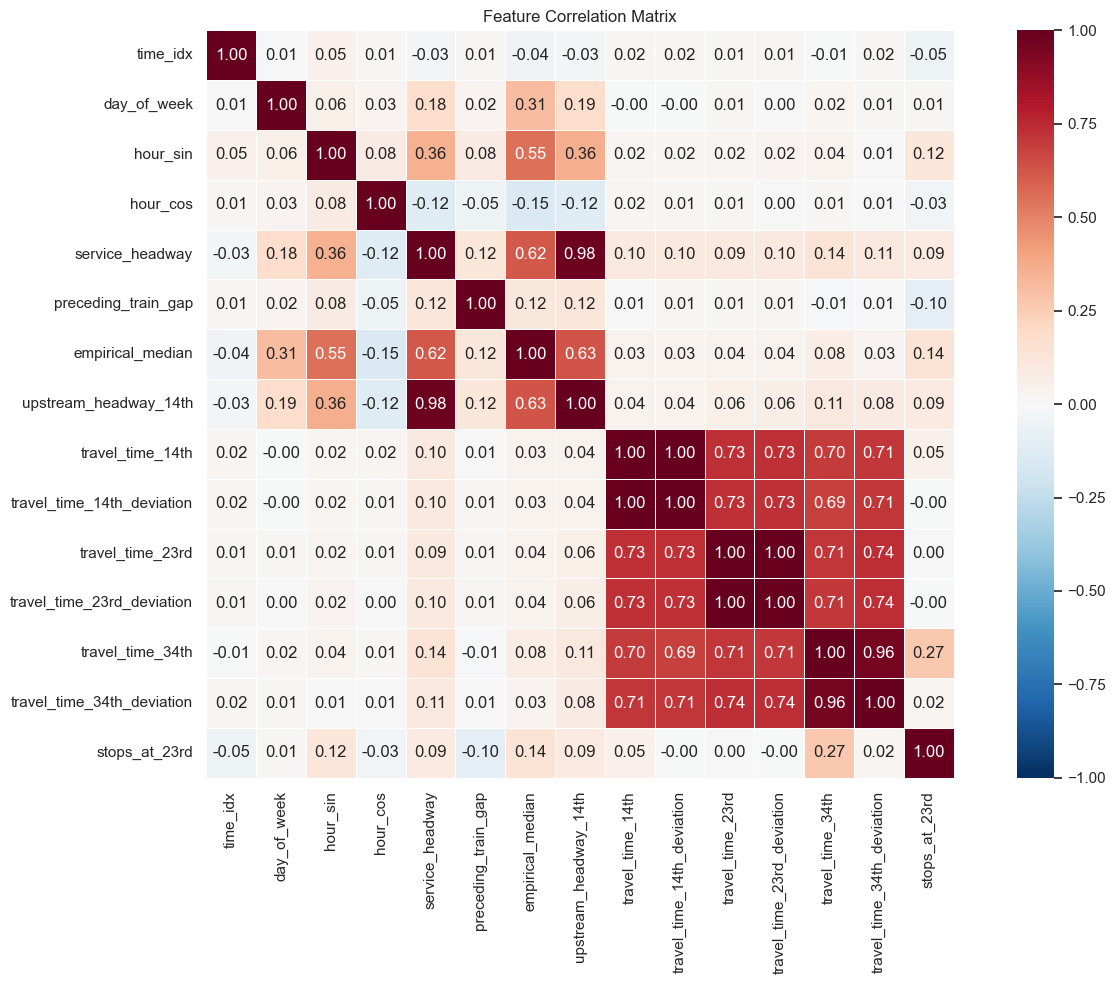

Correlation with service_headway (abs):
upstream_headway_14th         0.980294
empirical_median              0.618632
hour_sin                      0.357422
day_of_week                   0.183613
travel_time_34th              0.135392
preceding_train_gap           0.123010
hour_cos                      0.122578
travel_time_34th_deviation    0.109097
travel_time_23rd_deviation    0.097681
travel_time_14th              0.096159
travel_time_14th_deviation    0.096042
travel_time_23rd              0.094238
stops_at_23rd                 0.091346
time_idx                      0.028038
Name: service_headway, dtype: float64


In [12]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, ax=ax, vmin=-1, vmax=1)
ax.set_title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Show strongest correlations with target
target_corr = corr['service_headway'].drop('service_headway').abs().sort_values(ascending=False)
print("Correlation with service_headway (abs):")
print(target_corr)

## Key Feature Distributions

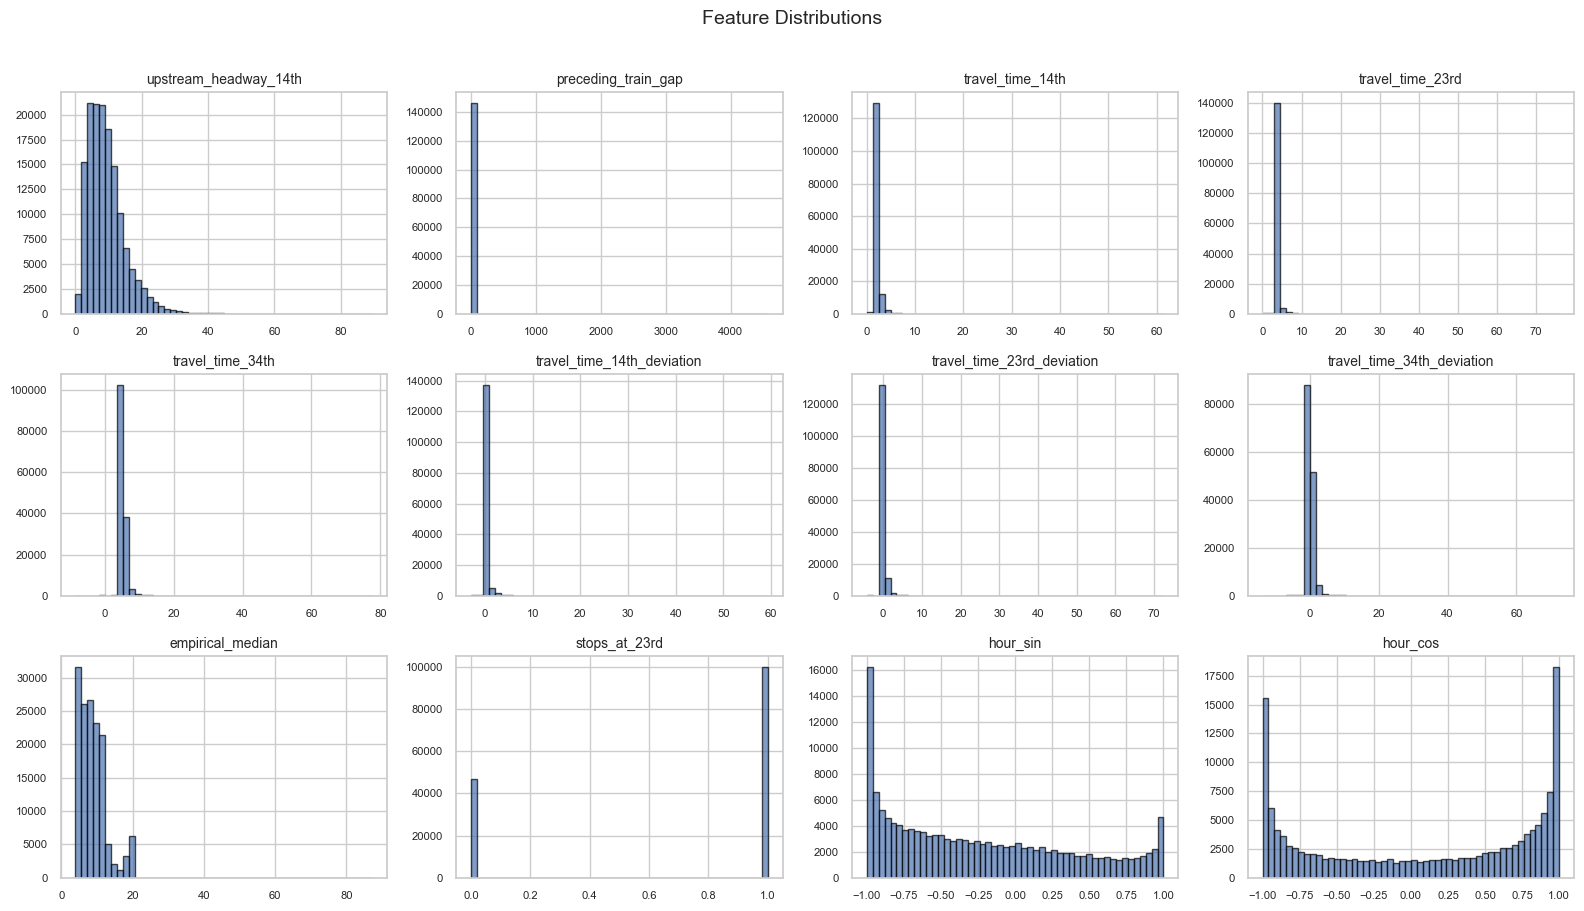

In [13]:
feature_cols = [
    'upstream_headway_14th', 'preceding_train_gap',
    'travel_time_14th', 'travel_time_23rd', 'travel_time_34th',
    'travel_time_14th_deviation', 'travel_time_23rd_deviation', 'travel_time_34th_deviation',
    'empirical_median', 'stops_at_23rd',
    'hour_sin', 'hour_cos'
]
plot_cols = [c for c in feature_cols if c in df.columns]

n = len(plot_cols)
ncols = 4
nrows = (n + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 3 * nrows))
axes = axes.flatten()

for i, col in enumerate(plot_cols):
    axes[i].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(labelsize=8)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Feature Distributions', fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

## Train / Validation / Test Split Check

time_idx range: [0, 57626]

Rows per group_id:
group_id
A_South        54368
C_South        34412
E_South        57627
OTHER_South      351
dtype: int64

Total rows: 146,758


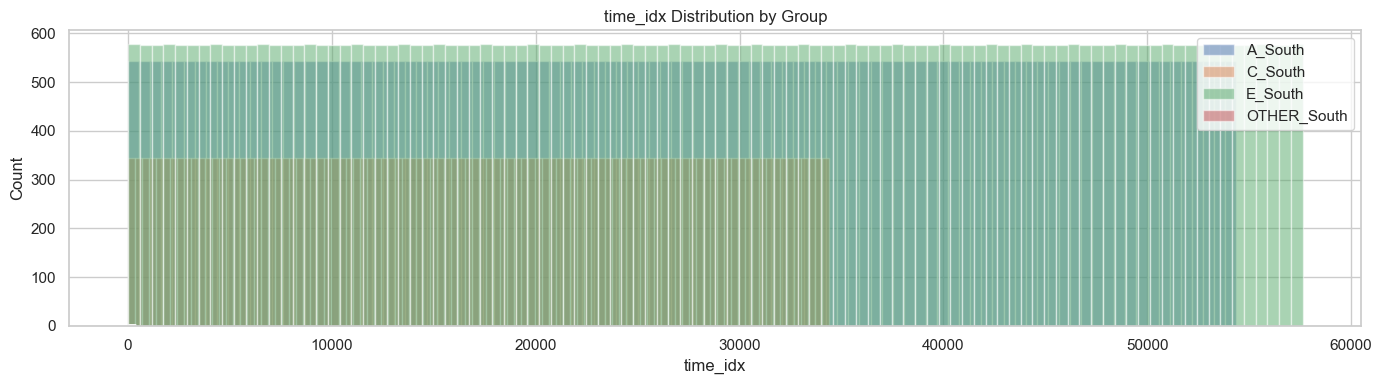


Expected split dates: train<2025-10-29 00:00:00, val<2025-12-23 00:00:00, test<2026-02-17 00:00:00


In [14]:
# Split boundaries from processing config
train_end = pd.Timestamp("2025-10-29")
val_end = pd.Timestamp("2025-12-23")
test_end = pd.Timestamp("2026-02-17")

# time_idx is relative — check group_id counts and time_idx range
print(f"time_idx range: [{df['time_idx'].min()}, {df['time_idx'].max()}]")
print(f"\nRows per group_id:")
print(df.groupby('group_id').size())
print(f"\nTotal rows: {len(df):,}")

# Since time_idx is relative (not a timestamp), show the distribution
fig, ax = plt.subplots(figsize=(14, 4))
for gid, grp in df.groupby('group_id'):
    ax.hist(grp['time_idx'], bins=100, alpha=0.5, label=gid)
ax.set_xlabel('time_idx')
ax.set_ylabel('Count')
ax.set_title('time_idx Distribution by Group')
ax.legend()
plt.tight_layout()
plt.show()

# Check data_processing.py split logic uses these boundaries
# train_end_idx computed from train_end_date in config
print(f"\nExpected split dates: train<{train_end}, val<{val_end}, test<{test_end}")

## Data Quality Checks

In [15]:
# Sanity checks
checks = []

# 1. No nulls in target
target_nulls = df['service_headway'].isnull().sum()
checks.append(("No nulls in service_headway", target_nulls == 0, f"{target_nulls} nulls"))

# 2. No negative headways
neg_hw = (df['service_headway'] < 0).sum()
checks.append(("No negative service_headway", neg_hw == 0, f"{neg_hw} negative"))

# 3. stops_at_23rd is binary
unique_stops = set(df['stops_at_23rd'].unique())
checks.append(("stops_at_23rd is binary", unique_stops <= {0.0, 1.0}, f"values: {unique_stops}"))

# 4. Express trains imputed (no NaN in travel_time_23rd)
tt23_nulls = df['travel_time_23rd'].isnull().sum()
checks.append(("travel_time_23rd fully imputed", tt23_nulls == 0, f"{tt23_nulls} nulls"))

# 5. Express imputed values check
express_mask = df['stops_at_23rd'] == 0.0
if express_mask.any():
    express_tt = df.loc[express_mask, 'travel_time_23rd'].unique()
    checks.append(("Express tt23 = 3.773551", set(np.round(express_tt, 4)) == {3.7736}, f"values: {express_tt[:5]}"))
    express_dev = df.loc[express_mask, 'travel_time_23rd_deviation'].unique()
    checks.append(("Express dev23 = 0.180276", set(np.round(express_dev, 4)) == {0.1803}, f"values: {express_dev[:5]}"))

# 6. time_idx is contiguous per group
for gid, grp in df.groupby('group_id'):
    tidx = grp['time_idx'].sort_values()
    gaps = tidx.diff().dropna()
    has_gaps = (gaps != 1).any()
    checks.append((f"time_idx contiguous ({gid})", not has_gaps, f"max gap: {gaps.max()}"))

# 7. Reasonable headway range (0-60 min)
outliers = ((df['service_headway'] > 60) | (df['service_headway'] <= 0)).sum()
checks.append(("service_headway in (0, 60] min", outliers == 0, f"{outliers} outliers"))

print("DATA QUALITY CHECKS")
print("=" * 60)
for name, passed, detail in checks:
    status = "✅ PASS" if passed else "⚠️ FAIL"
    print(f"{status}  {name}  ({detail})")

DATA QUALITY CHECKS
✅ PASS  No nulls in service_headway  (0 nulls)
✅ PASS  No negative service_headway  (0 negative)
✅ PASS  stops_at_23rd is binary  (values: {0.0, 1.0})
✅ PASS  travel_time_23rd fully imputed  (0 nulls)
✅ PASS  Express tt23 = 3.773551  (values: [3.773551])
✅ PASS  Express dev23 = 0.180276  (values: [0.180276])
✅ PASS  time_idx contiguous (A_South)  (max gap: 1.0)
✅ PASS  time_idx contiguous (C_South)  (max gap: 1.0)
✅ PASS  time_idx contiguous (E_South)  (max gap: 1.0)
✅ PASS  time_idx contiguous (OTHER_South)  (max gap: 1.0)
⚠️ FAIL  service_headway in (0, 60] min  (75 outliers)
